In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
import os
import json
import time

In [2]:
# Import MSA File
msa_agg = pd.read_csv('MSa_Agg.csv',low_memory=False)
msa_agg["Population_growth_%"]= msa_agg["Population_growth_%"] * 100
msa_agg

,MANAME,Zip_count,Population_2014,Population_2019,Population_growth,Affordability_2019,Income_Growth,Weighted_Cost_Change,Affordability_Change,Population_growth_%
0,Akron OH,44,684698.0,684197.0,-501.0,0.251995,0.150071,0.015408,-0.112078,-0.073171
1,Albany-Schenectady-Troy NY,97,901947.0,904693.0,2746.0,0.260619,0.153546,0.104488,-0.027628,0.304452
2,Albuquerque NM,41,889636.0,901623.0,11987.0,0.270181,0.104422,0.050645,-0.027977,1.347405
3,Allentown-Bethlehem-Easton PA-NJ,64,831644.0,842025.0,10381.0,0.265437,0.152977,0.044326,-0.080851,1.248250
4,Atlanta-Sandy Springs-Roswell GA,209,5555104.0,5971385.0,416281.0,0.257001,0.199617,0.047287,-0.116082,7.493667
...,...,...,...,...,...,...,...,...,...,...
64,Tucson AZ,37,978564.0,1010951.0,32387.0,0.266035,0.149762,0.039751,-0.091046,3.309646
65,Tulsa OK,95,1079049.0,1112119.0,33070.0,0.244363,0.128667,0.060656,-0.050574,3.064736
66,Virginia Beach-Norfolk-Newport News VA-N,80,1668548.0,1687644.0,19096.0,0.276800,0.134159,0.028774,-0.076847,1.144468
67,Washington-Arlington-Alexandria DC-VA-MD,264,5838956.0,6164488.0,325532.0,0.251348,0.147875,0.077727,-0.051700,5.575175


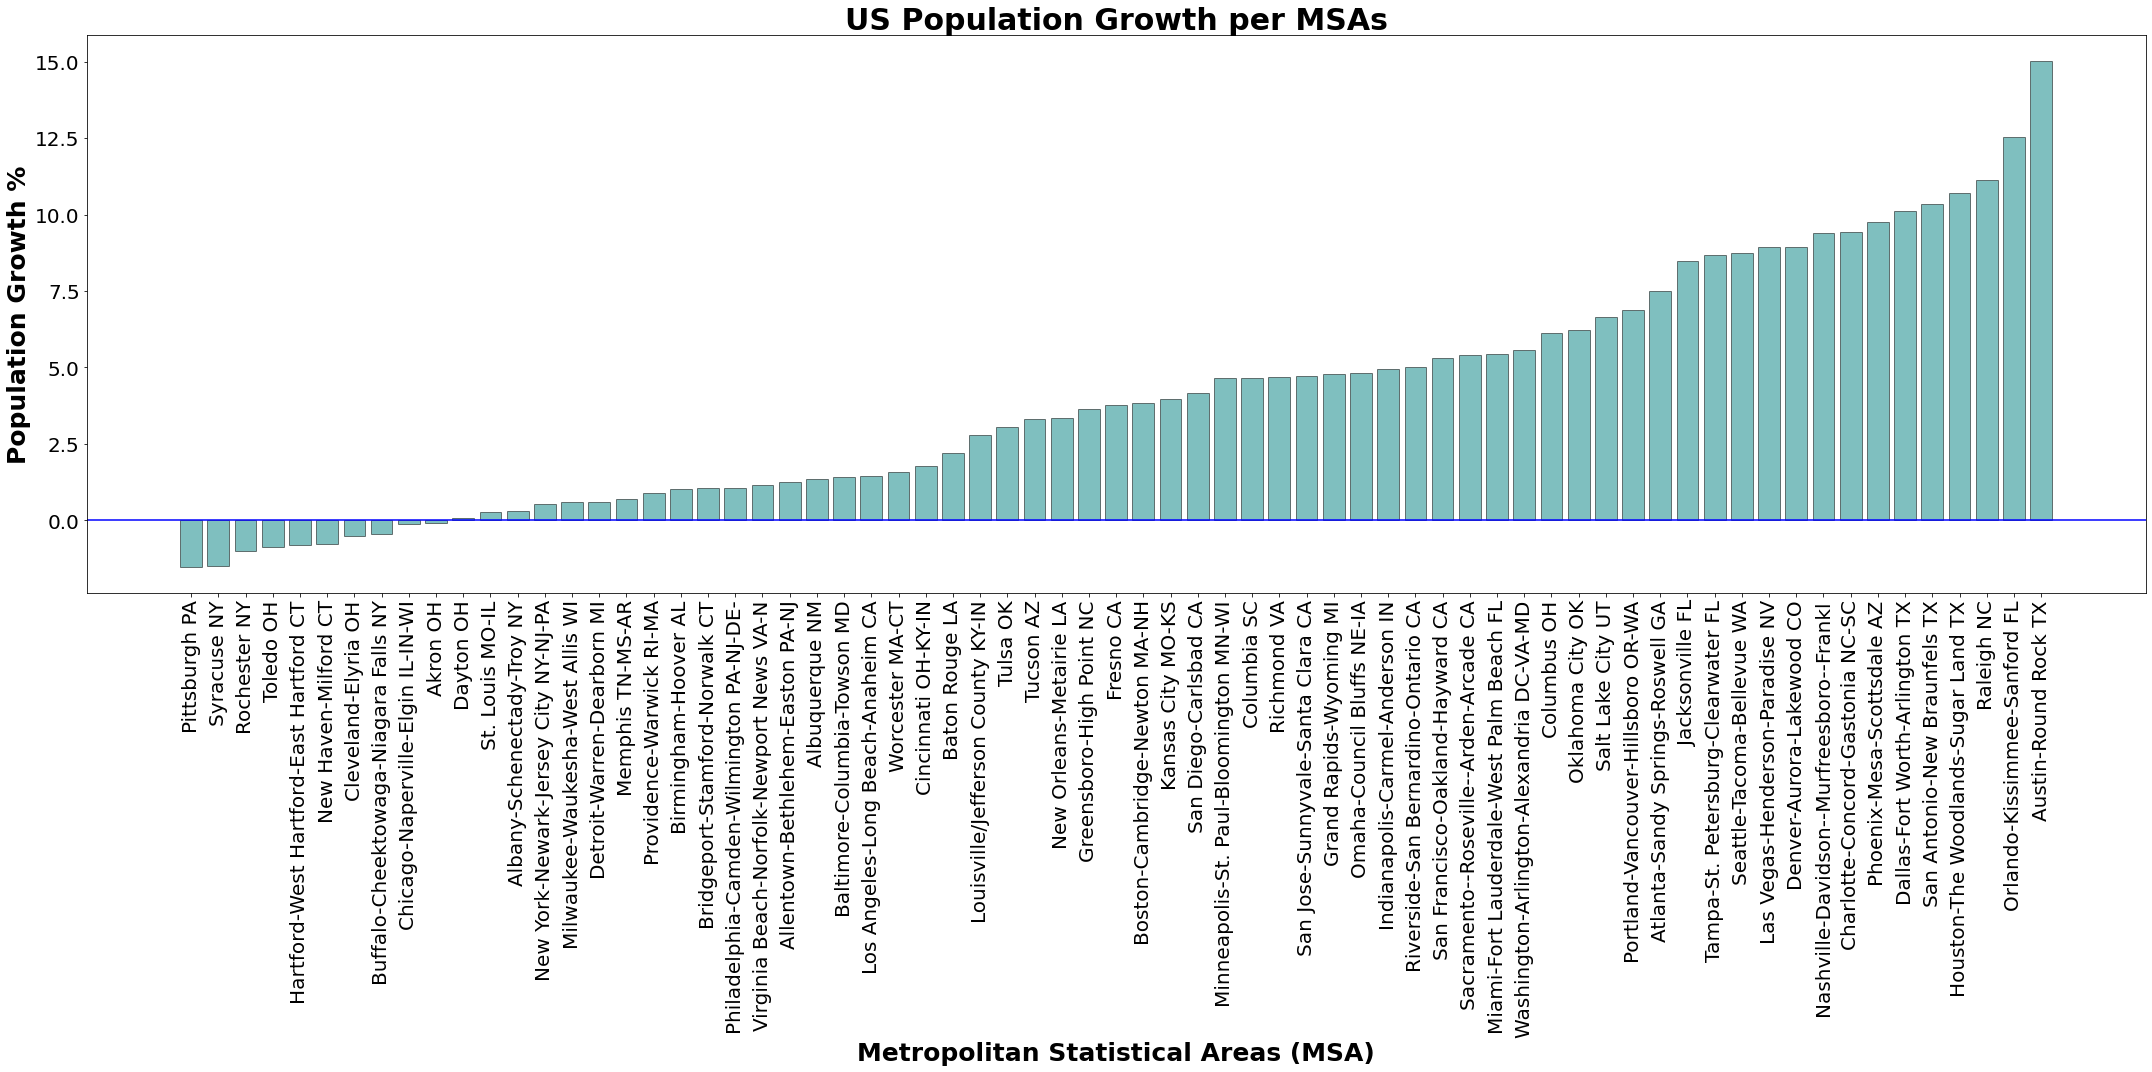

In [3]:
#Plot population growth for all MSAs one chart for macro view
msa_agg_sort=msa_agg.sort_values(by=["Population_growth_%"])
msa_agg_names= msa_agg_sort["MANAME"]
msa_agg_growth_percentage=msa_agg_sort["Population_growth_%"]
plt.figure(figsize=(30,15))
plt.bar(msa_agg_names,msa_agg_growth_percentage, color='teal',alpha=0.5, align='center',edgecolor='black')
plt.xlabel("Metropolitan Statistical Areas (MSA)",fontsize=25,fontweight='bold')
plt.ylabel("Population Growth %",fontsize=25,fontweight='bold')
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.axhline(y=0.0, color="b")
plt.title("US Population Growth per MSAs",fontsize=30,fontweight="bold")
plt.tight_layout()
plt.savefig("../Project_1/MSAAggFullBarChart.png")
plt.show()

In [4]:
# Import other CSV's for charting
msa_top_growth = pd.read_csv('MSA_top_growth_atl.csv',low_memory=False)
msa_least_affordable = pd.read_csv('MSA_least_affordable.csv',low_memory=False)
msa_bottom_growth = pd.read_csv('MSA_bottom_growth.csv',low_memory=False)

In [5]:
msa_bottom_growth

,MANAME,Zip_count,Population_2014,Population_2019,Population_growth,Affordability_2019,Income_Growth,Weighted_Cost_Change,Affordability_Change,Population_growth_%
0,Pittsburgh PA,285,2415050.0,2378155.0,-36895.0,0.234913,0.183587,0.079956,-0.055821,-0.015277
1,Syracuse NY,80,720317.0,709499.0,-10818.0,0.228460,0.169797,0.035449,-0.099320,-0.015018
2,Rochester NY,105,1133338.0,1121962.0,-11376.0,0.238324,0.141355,0.078086,-0.048770,-0.010038
3,Toledo OH,64,661736.0,655940.0,-5796.0,0.227599,0.178999,0.011475,-0.132945,-0.008759
4,Hartford-West Hartford-East Hartford CT,81,1194084.0,1184375.0,-9709.0,0.262795,0.139848,0.058734,-0.062996,-0.008131


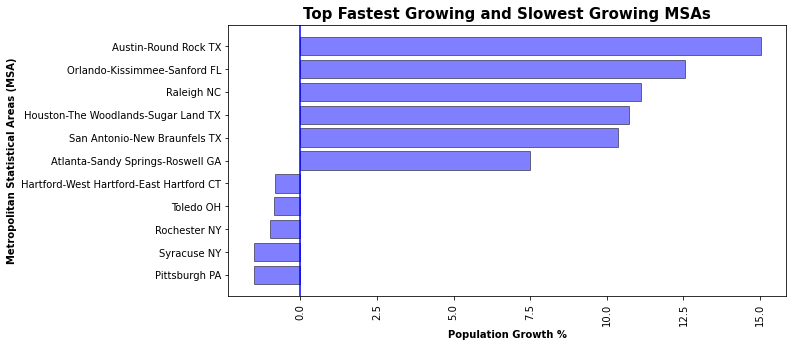

In [6]:
# Merge top growth and bottom growth dataframes into new dataframe to create one bar chart on population growth
#convert "Population_growth%"" values to perctange
msa_top_growth["Population_growth_%"]= msa_top_growth["Population_growth_%"] * 100
msa_bottom_growth["Population_growth_%"]= msa_bottom_growth["Population_growth_%"] * 100
#concatenate top and bottom growth dataframes
top_bottom_growth = pd.concat([msa_top_growth, msa_bottom_growth], axis=0)
#sort population growth column
top_bottom_growth_sort=top_bottom_growth.sort_values(by=["Population_growth_%"])
#define x and y values
x=top_bottom_growth_sort["MANAME"]
y=top_bottom_growth_sort["Population_growth_%"]
#top_bottom_growth bar chart features 
plt.figure(figsize=(10,5))
plt.barh(x,y,color="blue",alpha=0.5, align='center',edgecolor='black')
plt.xlabel("Population Growth %",fontsize=10,fontweight='bold')
plt.ylabel("Metropolitan Statistical Areas (MSA)",fontsize=10,fontweight='bold')
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.axvline(x=0.0, color="b")
plt.title("Top Fastest Growing and Slowest Growing MSAs",fontsize=15,fontweight="bold")
plt.savefig("../Project_1/MSATopBottomGrowthBarChart.png", bbox_inches="tight")
plt.show()

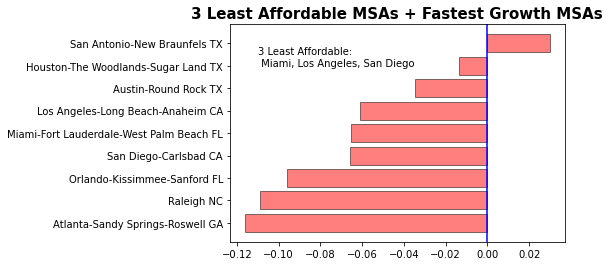

In [7]:
# Merge least affordable MSAs to create dataframe with all MSAs for bar chart of affordability
#concatenate top growth and least affordable dataframes then sort by affordablilty
least_affordable_with_all= pd.concat([msa_top_growth, msa_least_affordable], axis=0)
least_affordable_with_all_sort=least_affordable_with_all.sort_values(by=["Affordability_Change"])
#define x and y values
x=least_affordable_with_all_sort["MANAME"]
y=least_affordable_with_all_sort["Affordability_Change"]
#bar chart features 
plt.title("3 Least Affordable MSAs + Fastest Growth MSAs",fontsize=15,fontweight="bold")
plt.text(-0.11,7, "3 Least Affordable: \n Miami, Los Angeles, San Diego")
plt.barh(x,y,color="red", alpha=0.5, align='center',edgecolor='black')
plt.axvline(x=0.0, color="b")
plt.savefig("../Project_1/LeastAffordablewithAllBarChart.png", bbox_inches="tight")
plt.show()


In [8]:
msa_least_affordable

,MANAME,Zip_count,Population_2014,Population_2019,Population_growth,Affordability_2019,Income_Growth,Weighted_Cost_Change,Affordability_Change,Population_growth_%
0,Miami-Fort Lauderdale-West Palm Beach FL,181,5799992.0,6115562.0,315570.0,0.355004,0.199829,0.111752,-0.065537,0.054409
1,Los Angeles-Long Beach-Anaheim CA,359,13048701.0,13237188.0,188487.0,0.351986,0.214925,0.132145,-0.061131,0.014445
2,San Diego-Carlsbad CA,91,3154200.0,3285371.0,131171.0,0.325995,0.223041,0.122730,-0.066062,0.041586


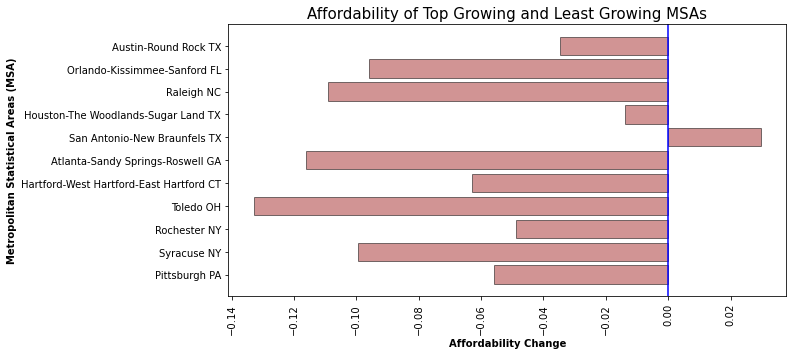

In [9]:
# Bar chart of change in affordability from the fastest and slowest growing MSAs dataframe

#concatenate top and bottom growth dataframes
top_bottom_growth = pd.concat([msa_top_growth, msa_bottom_growth], axis=0)
#sort population growth column
top_bottom_growth_sort=top_bottom_growth.sort_values(by=["Population_growth_%"])
#define x and y values
x=top_bottom_growth_sort["MANAME"]
y=top_bottom_growth_sort["Affordability_Change"]
#top_bottom_growth bar chart features
plt.figure(figsize=(10,5))
plt.barh(x,y,color="brown", alpha=0.5, align='center',edgecolor='black')
plt.xlabel("Affordability Change",fontsize=10,fontweight='bold')
plt.ylabel("Metropolitan Statistical Areas (MSA)",fontsize=10,fontweight='bold')
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.axvline(x=0.0, color="b")
plt.title("Affordability of Top Growing and Least Growing MSAs",fontsize=15)
plt.savefig("../Project_1/AffordabilityofFastSlowMSAsBarChart.png",bbox_inches="tight")
plt.show()

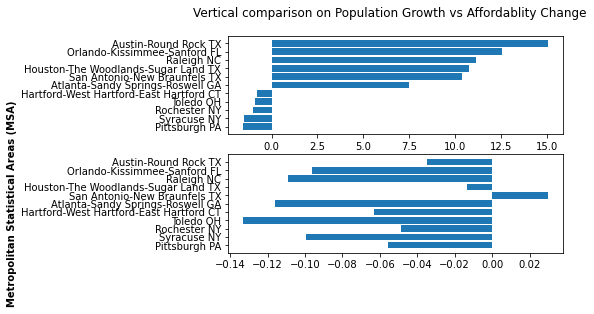

In [10]:
# Subplot Bar chart of Population Growth and Affordablity Change
x=top_bottom_growth_sort["MANAME"]
y=top_bottom_growth_sort["Population_growth_%"]
z=top_bottom_growth_sort["Affordability_Change"]
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertical comparison on Population Growth vs Affordablity Change')
ax1.barh(x,y)
ax2.barh(x,z)
plt.ylabel("Metropolitan Statistical Areas (MSA)",fontsize=10,fontweight='bold')
plt.savefig("../Project_1/Population_AffordabilityBarChart.png",bbox_inches="tight")
plt.show()

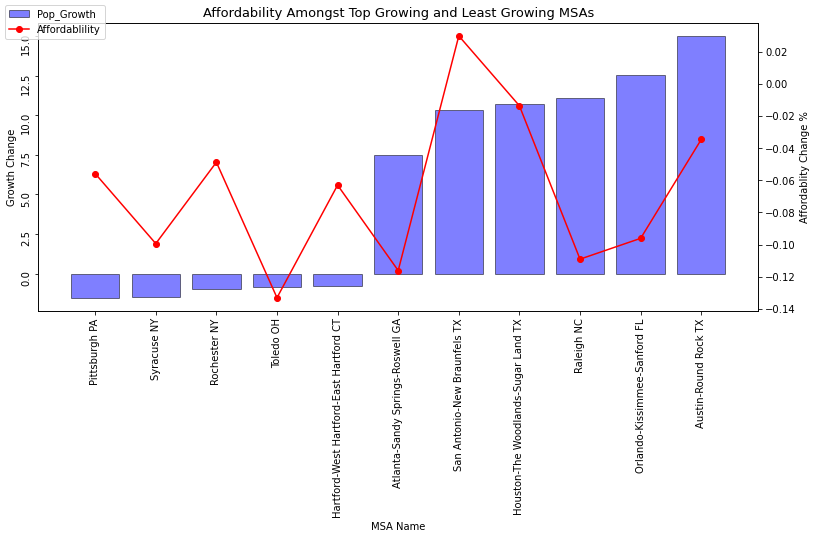

In [18]:
# Subplot Bar and line chart of Population Growth and Affordablity Change
fig = plt.figure(figsize=(5, 2))
a1 = fig.add_axes([0,0,2,2])
top_bottom_growth.sort_values(by=["Population_growth_%"])
x=top_bottom_growth_sort["MANAME"]
y=top_bottom_growth_sort["Population_growth_%"]
z=top_bottom_growth_sort["Affordability_Change"]
a1.tick_params(rotation=90)
a1.bar(x,y,color="blue",alpha=0.5, align='center',edgecolor='black')
a1.set_ylabel('Growth Change')
a1.set_xlabel("MSA Name")
a2 = a1.twinx()
a2.plot(x,z,'ro-')
a2.set_ylabel('Affordablity Change %')
fig.legend(labels = ('Pop_Growth','Affordablility'),loc='upper left')
plt.title("Affordability Amongst Top Growing and Least Growing MSAs",fontsize=13)
plt.savefig("../Project_1/AffordabilityAmongstFastSlowMSAsBarChart.png",bbox_inches="tight")
plt.show()

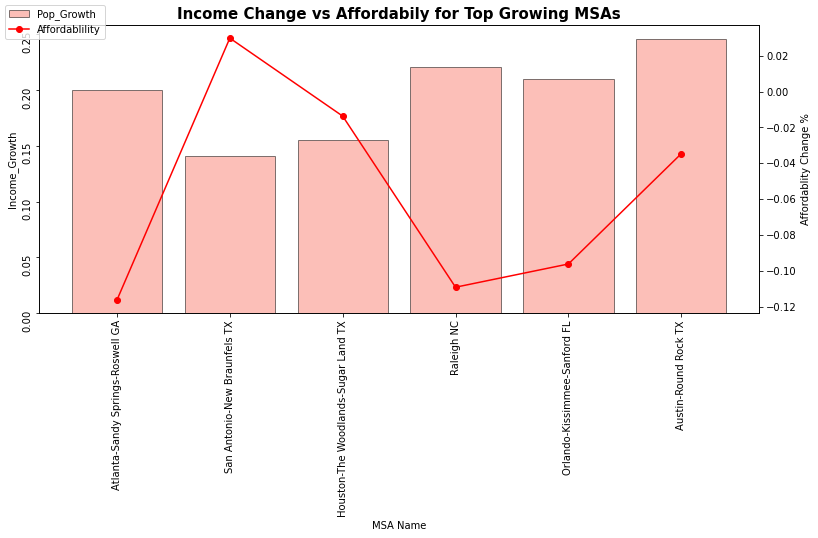

In [17]:
# Subplot Bar and line chart of Income Growth and Affordablity Change
fig = plt.figure(figsize=(5, 2))
a1 = fig.add_axes([0,0,2,2])
#sort population growth column
msa_top_growth_sort=msa_top_growth.sort_values(by=["Population_growth_%"])
a=msa_top_growth_sort["MANAME"]
b=msa_top_growth_sort["Income_Growth"]
c=msa_top_growth_sort["Affordability_Change"]
a1.tick_params(rotation=90)
a1.bar(a,b,color="salmon",alpha=0.5, align='center',edgecolor='black')
a1.set_ylabel('Income_Growth')
a1.set_xlabel("MSA Name")
a2 = a1.twinx()
a2.plot(a,c,'ro-')
a2.set_ylabel('Affordablity Change %')
fig.legend(labels = ('Pop_Growth','Affordablility'),loc='upper left')
plt.title("Income Change vs Affordabily for Top Growing MSAs",fontsize=15,fontweight="bold")
plt.savefig("../Project_1/IncomevsAffordBarChart2.png",bbox_inches="tight")
plt.show()